# Predicting heart disease using machine learning 

In this data science and machine learning project, we will use various Python-based Libraries to analysis, preprocess the data and build a Machine learning model.


## 1. Problem Statement

With the attributes described about the patient, can you predict if a patient has heart disease?
 
## 2. Data
 
Original data https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Kaggle link https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## 3. Evaluation

If we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features

Feature Information about data:

**Create data dictionary**
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* condition: 0 = no disease, 1 = disease



## Importing Libraries


In [107]:
## Standard Libraries from data preprocessing and ploting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Models From Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score


## Know your Dataset

In the initial phase of our project, the first crucial step involves the acquisition and exploration of the dataset. Our dataset serves as the foundation for training and evaluating our machine learning model for predicting heart disease. This dataset comprises a comprehensive collection of relevant features and corresponding labels, where each instance represents a person and their associated health attributes.

The process of reading the dataset involves utilizing programming tools and libraries, such as Pandas in Python, to load the data into a structured format suitable for analysis. We pay meticulous attention to understanding the dataset's structure, checking for missing values, and exploring statistical summaries to gain insights into the distribution and characteristics of the variables.

By effectively reading and understanding the dataset, we set the stage for subsequent phases, enabling us to make informed decisions about preprocessing steps, feature selection, and model development. This foundational step is critical in ensuring the quality and reliability of the data, ultimately influencing the robustness and accuracy of our heart disease prediction model.

## Reading the dataset

In [49]:
df= pd.read_csv("heart-disease.csv") # reads the csv file of your dataset
df.shape # returns the shape of your 

(303, 14)

## Data Exploration And Preprocessing

In this phase, we meticulously explore and prepare the dataset for our heart disease prediction model.

Data Exploration:

* Descriptive Stats: Understand dataset characteristics.
* Visualizations: Uncover patterns and relationships.

Data Preprocessing:

* Handle Missing Values: Ensure data completeness.
* Feature Scaling: Normalize numerical features.
* Categorical Encoding: Convert categorical to numerical.
* Feature Selection: Optimize relevant features.

These steps refine the dataset, setting the stage for effective machine learning model training and evaluation.

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [52]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

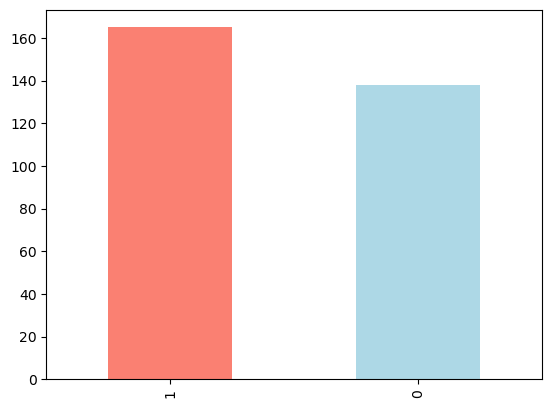

In [53]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

This analysis focuses on understanding the relationship between the occurrence of heart disease and the gender of individuals in our dataset.

By comparing heart disease frequency across genders, we aim to gain insights that may contribute to a better understanding of how gender correlates with the likelihood of developing heart disease in our dataset.

In [57]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [58]:
# Compare target coulmn with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


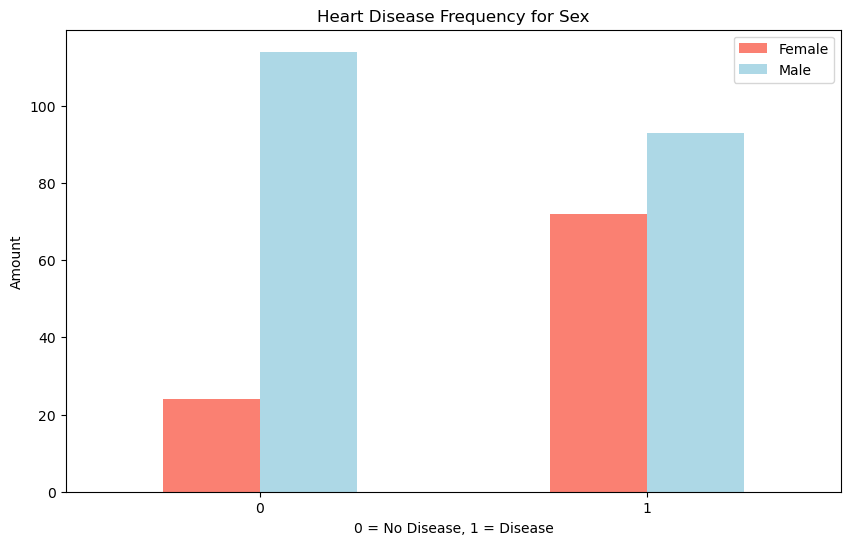

In [59]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease 

This analysis focuses on exploring the relationship between age and maximum heart rate within our dataset, shedding light on potential patterns or correlations.
Examine trends or clusters in the scatter plots to identify potential age-related patterns in maximum heart rates.

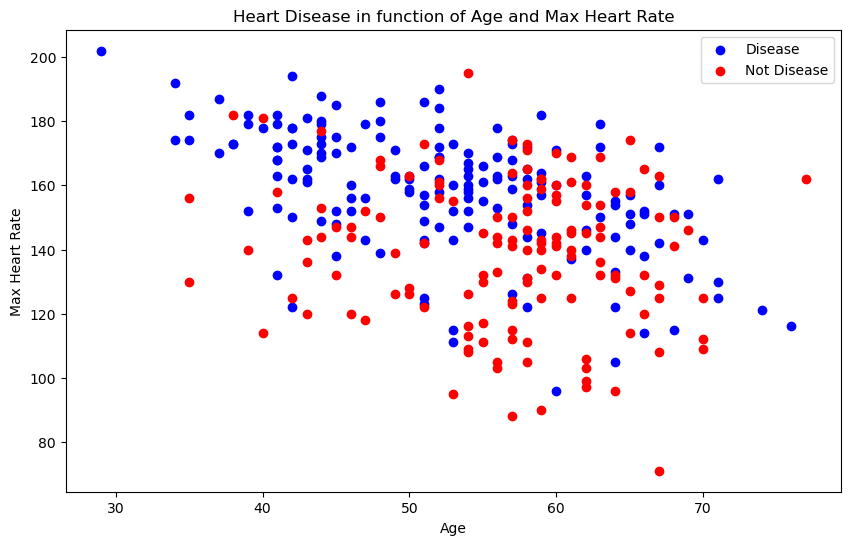

In [60]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="blue")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="red")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","Not Disease"]);

Text(0.5, 0, 'Age')

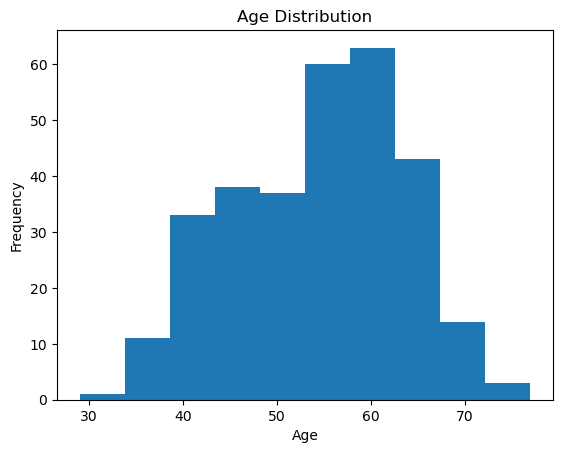

In [61]:
# Check the distribution of age column with a histogram

df.age.plot.hist()
plt.title("Age Distribution")
plt.xlabel("Age")

## Heart Disease Frequency per Chest Pain Type

This investigation aims to uncover potential associations between different types of chest pain and the occurrence of heart disease within our dataset.

Cross-Tabulation: Create a cross-tabulation or contingency table to quantify the relationship between chest pain types and heart disease presence.

In [62]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


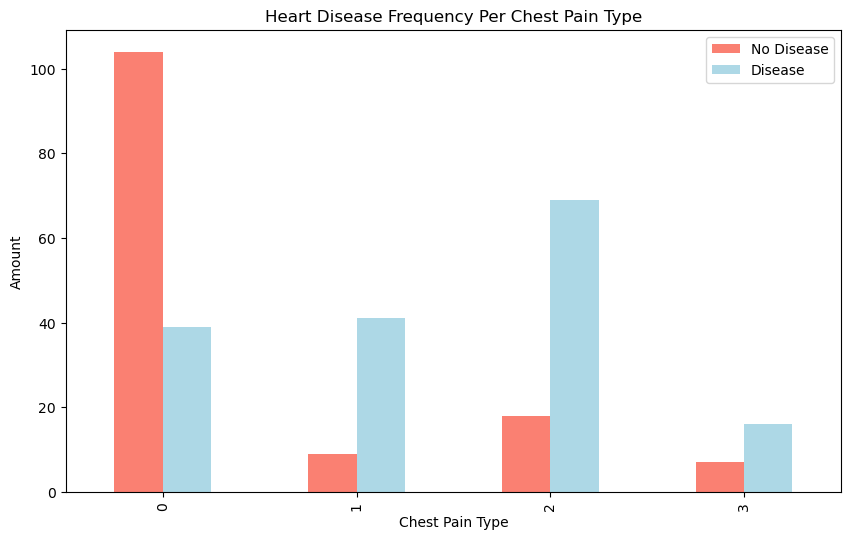

In [63]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])

## Correlation Matrix

The correlation matrix aids in identifying potential multicollinearity among features, guiding feature selection decisions and contributing to a nuanced understanding of how variables interact within our heart disease prediction model.

Visualize the correlation coefficients between pairs of features using a heatmap.

In [64]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


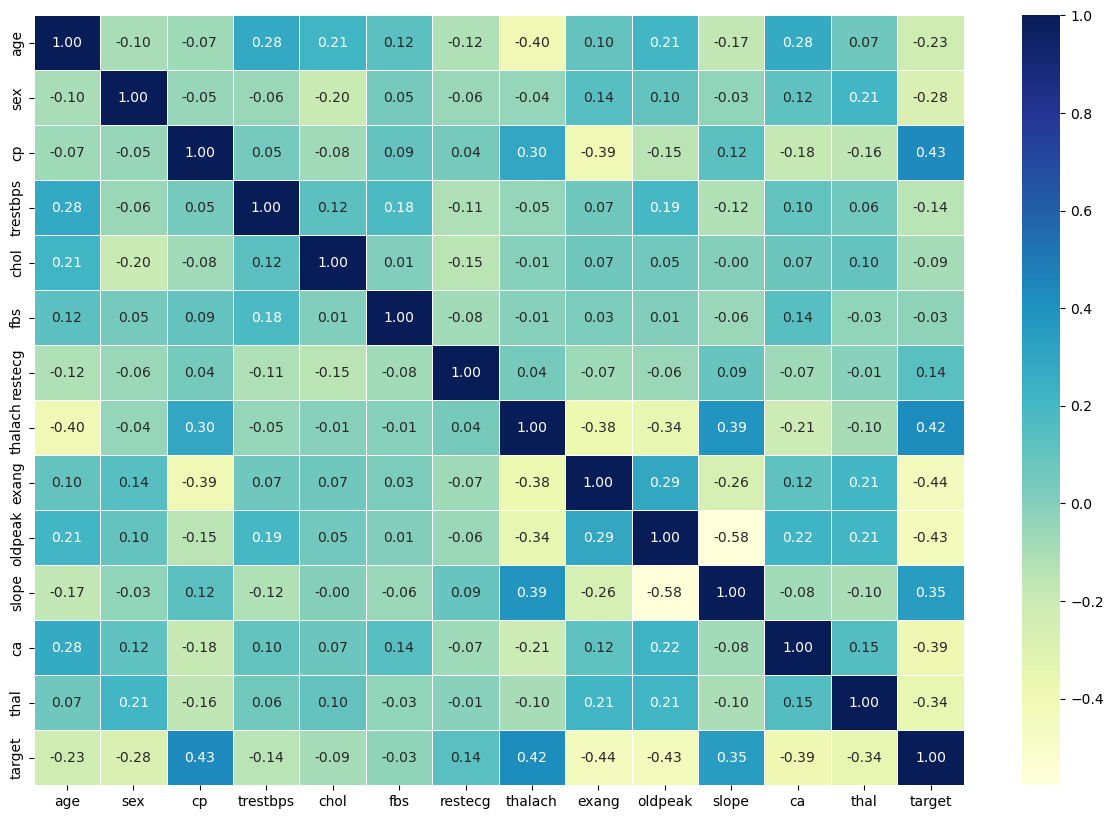

In [65]:
correlation_matrix= df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(correlation_matrix,
               annot=True,
               linewidth=0.5,
               fmt=".2f",
               cmap="YlGnBu"); 

## Modelling

Modeling Phase:

In the modeling phase, we leverage machine learning algorithms to build a predictive model for heart disease based on the prepared dataset. This involves several key steps:

1. Data Splitting:

Divide the dataset into training and testing sets to train the model on one subset and evaluate its performance on another, ensuring a robust assessment of generalization.

2. Model Selection:

Choose appropriate algorithms based on the nature of the problem (classification in this case), dataset size, and computational considerations.

3. Model Training:

Utilize the training set to teach the model to recognize patterns and relationships within the data.

4. Hyperparameter Tuning:

Fine-tune model hyperparameters to optimize performance. This process may involve techniques such as grid search or random search.

5. Model Evaluation:

Assess the model's performance on the testing set using metrics such as accuracy, precision, recall, and F1-score to gauge its effectiveness in predicting heart disease.

6. Validation and Cross-Validation:

Implement techniques like k-fold cross-validation to ensure the model's consistency and reliability across different subsets of the data.

7. Model Interpretability:

Depending on the algorithm, explore methods for interpreting the model's decisions, enhancing our understanding of the features contributing to heart disease prediction.

The modeling phase is a dynamic process involving iteration and refinement to achieve the most accurate and generalizable heart disease prediction model. Adjustments to algorithms and parameters are made based on the evaluation results, ultimately leading to a model ready for deployment in real-world scenarios.

### 1. Data Splitting 

In [66]:
X= df.drop("target",axis=1)

y= df["target"]

In [67]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [68]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [69]:
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [70]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [71]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### 2. Model Selection

Which Model to use???

So this might be the most asked question for anone who has started building models in machine learning. The choice of a classification model depends on various factors, including the characteristics of your dataset, the size of your data, interpretability requirements, and computational considerations. 

I personally prefer and used the Sklearn's Machine Learning Map to choose the right model for my dataset.

link : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 3. Model Training

In [72]:
# Put models in a dictionary

models= {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test,y_train,y_test):
    """
    Fits and Evaluates given machine learning models.
    mdels: a dictionay of different Scikit_learn Machine Learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    
    """
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores= {}
    # Loop through models
    for name, model in models.items():
        
        model.fit(X_train,y_train)
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [73]:
model_scores= fit_and_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

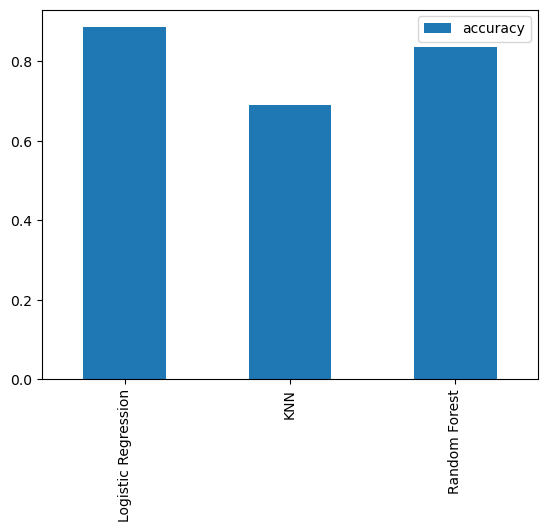

In [74]:
model_compare = pd.DataFrame( model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### 4. Hyperparameter Tuning

As discussed earlier hyperparameter tuning is used to optimize performance of the model. Here we used 

1. For KNN I did some research by going to the official Sklearn page for KNN and handpicked some important parameters and trained it by changing the default values of those parameters 

In [75]:
# For KNN

train_scores=[]
test_scores=[]

neighbors= range(1,21)

knn =KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))
    

In [76]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [77]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


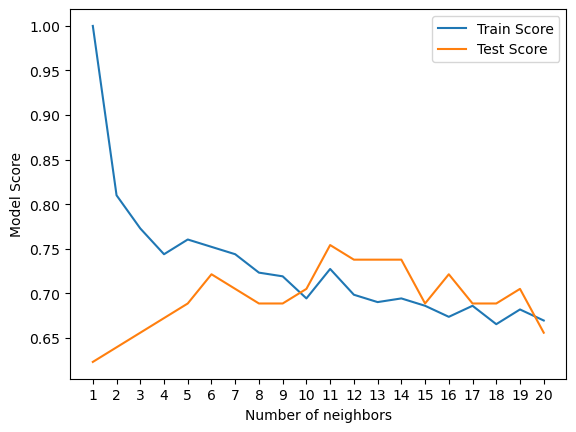

In [78]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
      

### Using RandomizedSearchCV

RandomizedSearchCV efficiently explores hyperparameter space, helping you find optimal settings for your chosen model. This iterative process enhances the performance of your heart disease prediction model, providing better generalization to new data. Adjust the hyperparameter grid and model accordingly based on your specific requirements and observations during the tuning process.

Again to choose the parameter values for the grid I went through the documentation of Logistic Regression as well as RandomForestClassifier.

Link for Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Link for Logistic Regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [79]:
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}

random_re_grid={"n_estimators": np.arange(10,1000,50),
               "max_depth" :[None,3,5,10],
               "min_samples_split":np.arange(2,20,2),
               "min_samples_leaf": np.arange(1,20,2)}

In [80]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [81]:
rs_log_reg.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [82]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [83]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=random_re_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [84]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [85]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Using GridsearchCV

GridSearchCV exhaustively searches through the specified hyperparameter combinations, providing a comprehensive optimization process. Adjust the hyperparameter grid and model according to your specific requirements and available computational resources.

Here, as we already chose the best parameters in RandomSearchCV, just copy that grid here too.

In [87]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [89]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [90]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### 5. Evaluation Matrix

**Evaluation Metrics for Heart Disease Prediction Model:**

1. **ROC Curve and AUC Score:**
   - **ROC Curve:** Graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various thresholds.
   - **AUC Score:** Area Under the ROC Curve quantifies the model's ability to distinguish between classes. Higher AUC values indicate better performance.

2. **Confusion Matrix:**
   - A table illustrating the model's performance by comparing predicted and actual classifications.
   - |               | Predicted Positive | Predicted Negative |
     | ------------- | ------------------ | ------------------ |
     | Actual Positive | True Positive      | False Negative     |
     | Actual Negative | False Positive     | True Negative      |

3. **Classification Report:**
   - Provides a comprehensive summary of key classification metrics.
     - Precision: Proportion of true positive predictions among all positive predictions.
     - Recall: Proportion of true positive predictions among all actual positive instances (sensitivity).
     - F1-score: Harmonic mean of precision and recall, offering a balanced measure.
     - Support: Number of occurrences of each class.

4. **Precision:**
   - The ratio of true positive predictions to the total predicted positives. Precision indicates the accuracy of positive predictions.

   
5. **Recall:**
   - The ratio of true positive predictions to the total actual positives. Recall measures the model's ability to capture all positive instances.

   

6. **F1-Score:**
   - The harmonic mean of precision and recall, providing a balanced measure of a model's performance.

 
These evaluation metrics collectively offer a thorough assessment of your heart disease prediction model's performance, addressing different aspects of classification accuracy, balance, and robustness. Consider these metrics collectively to make informed decisions about the effectiveness of your model in identifying individuals with or without heart disease.

In [92]:
y_preds = gs_log_reg.predict(X_test)

In [93]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

#### Import ROC curve

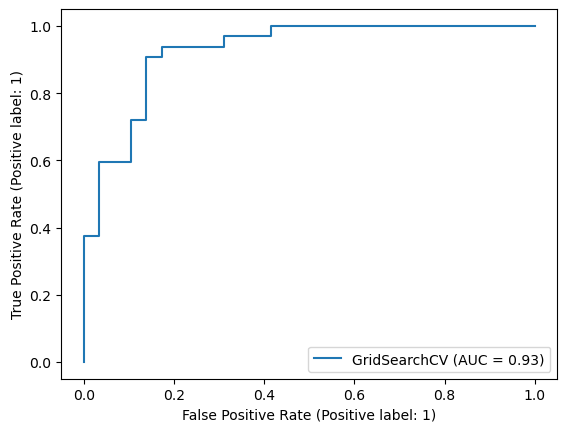

In [97]:
 from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
 

#### Confusion matrix


In [99]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


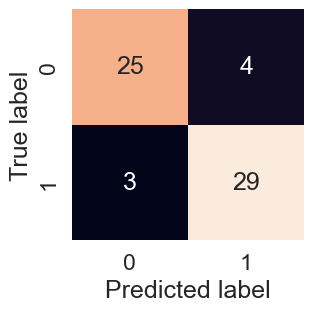

In [101]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

#### Classification Report

In [103]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Cross validation

In [104]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [105]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

In [108]:
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [111]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8446994535519124

In [112]:
cv_pre = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [114]:
cv_pre= np.mean(cv_pre)
cv_pre

0.8207936507936507

In [115]:
cv_re = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_re

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [116]:
cv_re= np.mean(cv_re)
cv_re

0.9212121212121213

In [117]:
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [118]:
cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated Classification metrics'}>

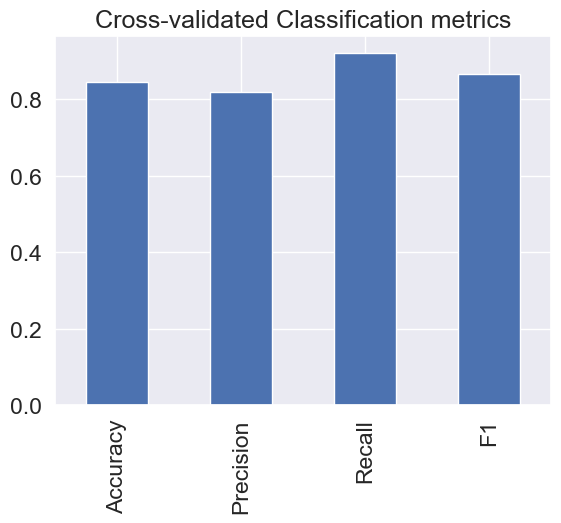

In [121]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pre,
                          "Recall": cv_re,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification metrics",
                     legend = False )

### 6.  Feature Importance

Which of the features in the dataset are the ones that contributed most to the outcomes of the model and how did they contribute ?

It provides valuable insights into the factors contributing to heart disease predictions, enabling a more informed understanding of the underlying patterns in your data.








In [122]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [123]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [124]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

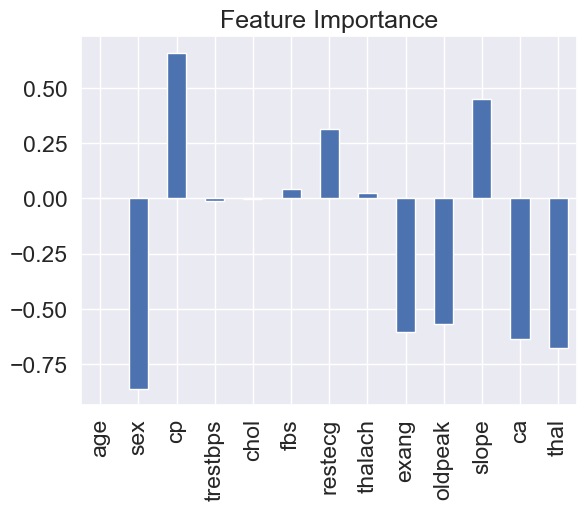

In [126]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## Save And Load

By saving and loading your model, you can avoid the need to retrain it every time you want to make predictions or share your model with others. This is particularly useful in deployment scenarios where the trained model needs to be used in a production environment.

In [127]:
import pickle

pickle.dump(gs_log_reg,open("gs_logistic_reg_heart_disease_model.pkl","wb"))

## Project Summary: Heart Disease Prediction

In this machine learning classification project, our goal was to develop a predictive model for determining whether an individual is likely to have heart disease. We followed a systematic approach, starting with the exploration and preprocessing of the dataset, including reading and understanding the data, exploring distributions, and handling missing values.

For the modeling phase, we considered various classification algorithms, with a focus on logistic regression, decision trees, random forests, support vector machines, k-nearest neighbors, and neural networks. We utilized tools like RandomizedSearchCV and GridSearchCV for hyperparameter tuning, enhancing the models' performance.

Our evaluation metrics included ROC curve and AUC score, confusion matrix, classification report, precision, recall, and F1-score, providing a comprehensive assessment of model effectiveness.

To interpret the model, we explored feature importance, identifying the key variables contributing to the predictions. This insight aids not only in understanding the model but also in guiding future data collection and feature engineering efforts.

Finally, we discussed the importance of saving and loading the trained model for future use or deployment in real-world scenarios.

**Credits:**
This project benefited significantly from the resources and documentation provided by scikit-learn's official website (https://scikit-learn.org/) and its documentation. The wealth of information, examples, and community support on Stack Overflow played a crucial role in resolving errors, addressing doubts, and refining the implementation. We acknowledge and appreciate the contributions of these platforms to the success of our project.

# Please Do Upvote me in the Kaggle

https://www.kaggle.com/code/nikunjmahida/heart-disease-prediction

In [ ]:
s